In [1]:
import pandas as pd
ageinc_df = pd.read_csv('ageinc.csv')

In [2]:
ageinc_df['z_income'] = (ageinc_df['income'] - ageinc_df['income'].mean())/ageinc_df['income'].std()
ageinc_df['z_age'] = (ageinc_df['age'] - ageinc_df['age'].mean())/ageinc_df['age'].std()

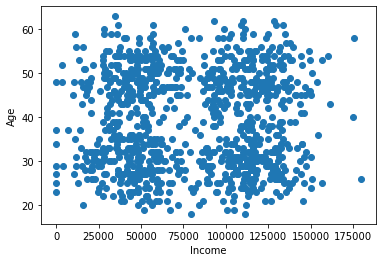

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(ageinc_df['income'], ageinc_df['age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

In [4]:
from sklearn import cluster

model = cluster.KMeans(n_clusters=4, random_state=10)
model.fit(ageinc_df[['z_income','z_age']])

KMeans(n_clusters=4, random_state=10)

In [5]:
ageinc_df['cluster'] = model.labels_
ageinc_df.head()


,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,2
1,49597,27,-0.777331,-1.130565,3
2,36517,52,-1.110474,1.146963,1
3,33223,49,-1.194372,0.873660,1
4,72994,53,-0.181416,1.238064,1


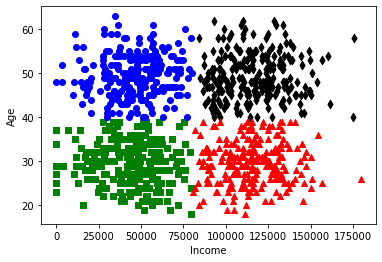

In [6]:
colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

for c in ageinc_df['cluster'].unique():
    d = ageinc_df[ageinc_df['cluster'] == c]
    plt.scatter(d['income'], d['age'], marker=markers[c], color=colors[c])
    
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()